In [1]:
# https://github.com/sdv-dev/CTGAN

import os
import sys
sys.path.append('./')
sys.path.append('../')
import matplotlib.pyplot as plt

from Synthetic_CTGan.ctgan import CTGAN

import pandas as pd

print(os.getcwd())

c:\Home\MyWorkspace\fbEvasionMetrics\AdvFailureCurves\Synthetic_CTGan


# Load Data

In [3]:
strDataPath = './local-data/census.csv'
dfRealData = pd.read_csv(strDataPath)
print(dfRealData.shape)
print(dfRealData.head(5))

(32561, 15)
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0 

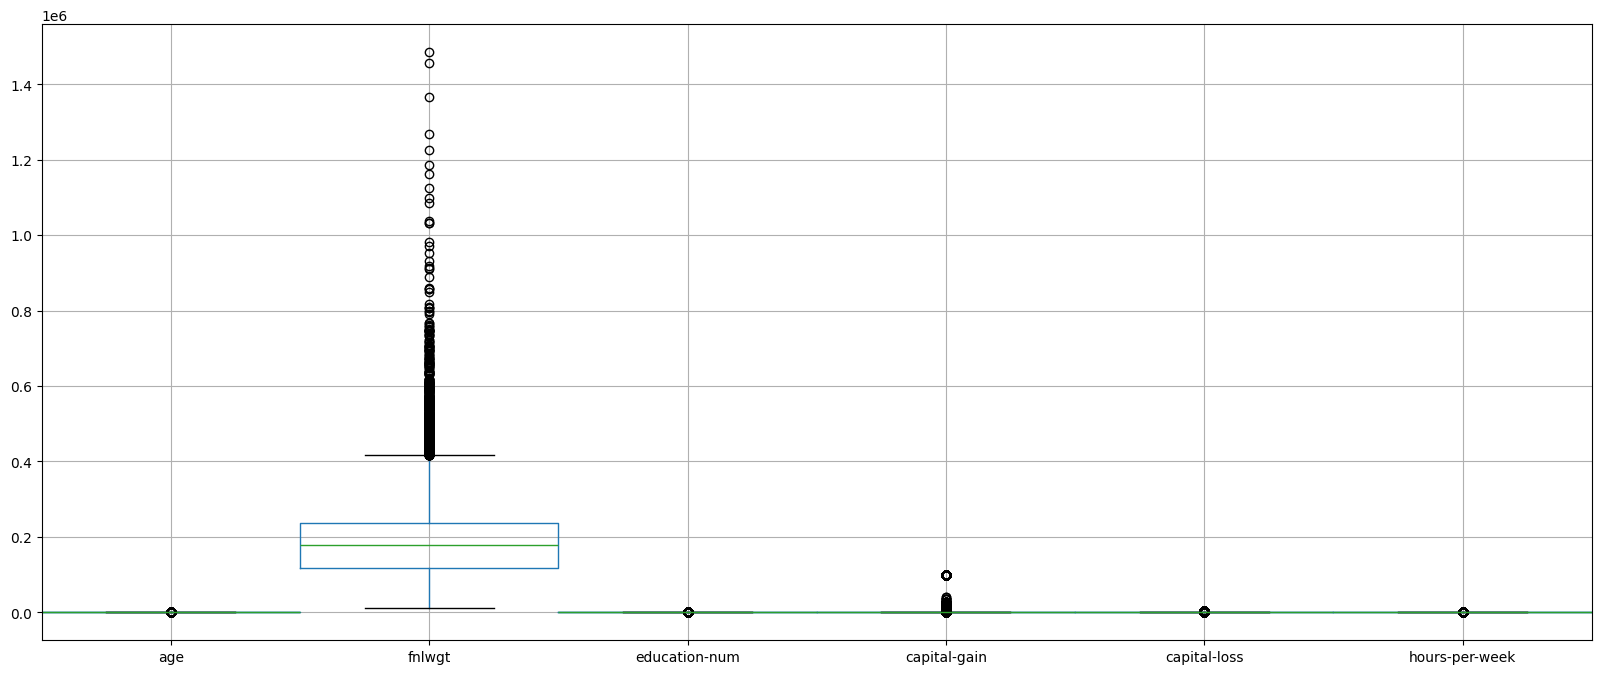

In [4]:
dfRealData.boxplot(figsize = (20, 8), widths = 1)
plt.show()

In [5]:
# Names of the columns that are discrete
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income'
]

# Generate Synthetic Data

In [6]:
ctgan = CTGAN(epochs=10)
ctgan.fit(dfRealData, discrete_columns)

# Create synthetic data
dfSynData = ctgan.sample(100)
print(dfSynData.shape)
print(dfSynData.head(5))

(100, 15)
   age    workclass  fnlwgt  education  education-num      marital-status  \
0   50      Private  205436    Masters             12  Married-civ-spouse   
1   63      Private   87039  Doctorate             12           Separated   
2   33      Private  229851    HS-grad              5  Married-civ-spouse   
3   40  Federal-gov  246700    HS-grad             16            Divorced   
4   31      Private  248820    HS-grad             13  Married-civ-spouse   

     occupation    relationship   race     sex  capital-gain  capital-loss  \
0  Craft-repair       Own-child  White  Female            78            -1   
1  Adm-clerical   Not-in-family  White    Male            89             2   
2         Sales   Not-in-family  White    Male           112            -2   
3         Sales  Other-relative  White  Female          5142            -3   
4         Sales         Husband  White  Female           -27            -1   

   hours-per-week native-country income  
0              4